In [19]:
%matplotlib inline
from preamble import *

#### Some Sample Datasets

X.shape: (26, 2)


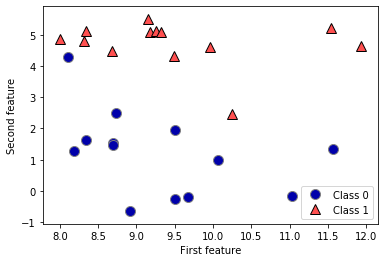

In [20]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

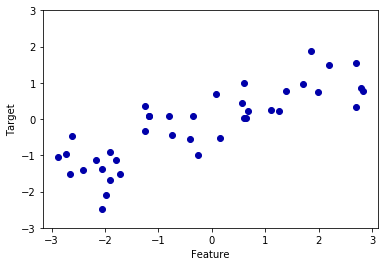

In [21]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

### Decision trees

In [22]:
import sys
sys.path

['/Users/kayla/Desktop/ML teaching/introduction_to_ml_with_python',
 '/Users/kayla/opt/anaconda3/lib/python37.zip',
 '/Users/kayla/opt/anaconda3/lib/python3.7',
 '/Users/kayla/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/kayla/opt/anaconda3/lib/python3.7/site-packages',
 '/Users/kayla/opt/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/kayla/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/kayla/.ipython']

In [23]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


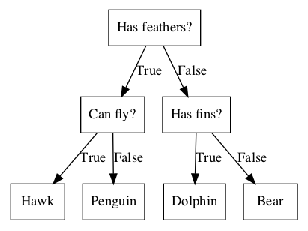

In [24]:
mglearn.plots.plot_animal_tree()

##### Building decision trees

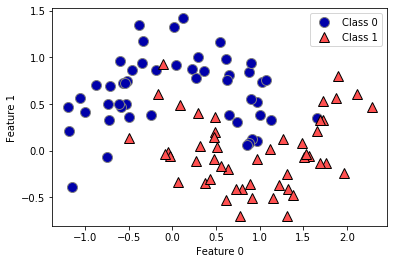

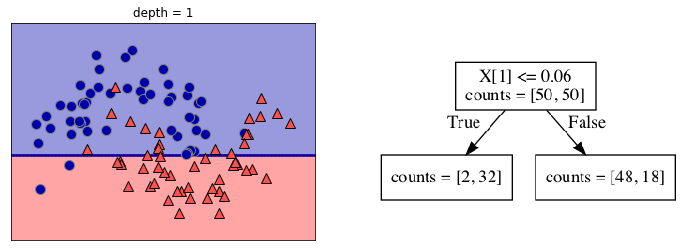

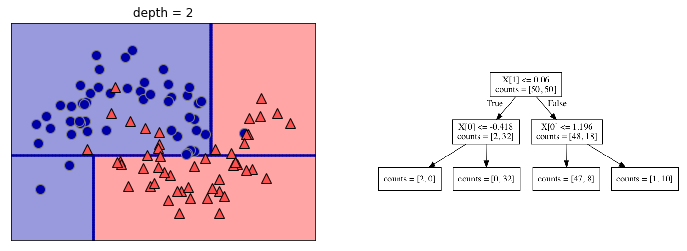

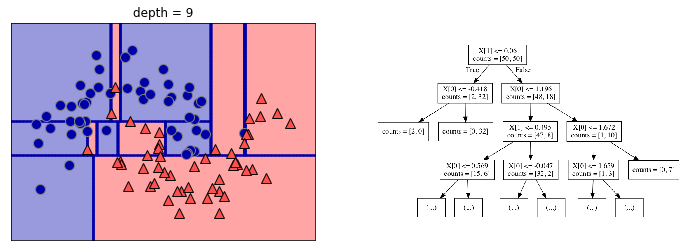

In [25]:
mglearn.plots.plot_tree_progressive()

##### Controlling complexity of decision trees
Here we can see the difference in training and testing scores when we control the overfitting of the tree. The first block of code overfits to the training data (as shown by the training set score). In the next block of code we limit the max depth of the tree. Notice the change in scores. 

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [27]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing Decision Trees

In [28]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

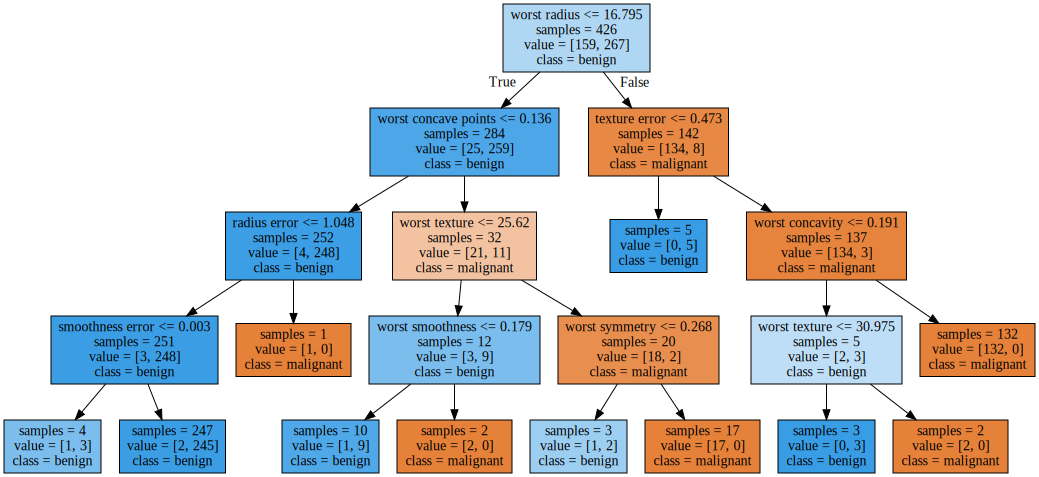

In [29]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees

In [30]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


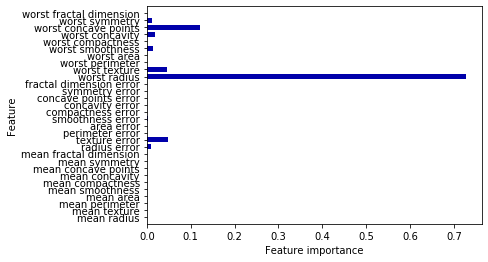

In [31]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)